$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Gm}{\mathbf{G}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$


# Assignment #3 - Neural Networks


### Name : Varsha Sureshkumar Maurya

# I. Overview

## Objective

In this assignment we will try to implement Neural Network Algorithm

1. **Non Linear Regression Model**
2. **Non Linear Logistic Regression Model**

## Approach

We will be using the Feed Forward neural network and modify the structure of the neural network like activation function and fine tune the hyperparameters to get good results on our dataset.

We will also be implementing Cross Validation so that we can choose the best structure for our model and also observe how our data behaves for different structural and hyper-parameters associated with respect to Neural Networks.


# II Data

## II a) Description of Data


#### 1. Non Linear Regression Data Description

Dataset provided in kaggle to perform linear regression [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)
The Seattle housing prices dataset has roughly around 71k samples
The interesting features that are available are
1. SqFT of the apartments
2. Number of Bedroom for each house
3. Location of the apartments
4. Grade of the apartments
We will use all these features and try to analyse how our linear regression model looks like after training it.

#### 2. Non Linear Logistic Regression Data Description

Dataset provided in kaggle to perform classification is [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)
This Dataset roughly has 122k observation but since the dataset is exteremely skewed for not having rain we will adjust it to 71k samples.
1. Interest Points are Max and Min temp
2. Humidity also looks a important feature
3. Rainfall on that given day.


## II b) Plots to visualize data

In [2]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd  # for display and clear_output

### Non Linear Regression

In [3]:
raw_data_lr = pd.read_csv('kc_house_data.csv',delimiter=',')
raw_data_lr['zipcodeC'] = pd.factorize(raw_data_lr.zipcode)[0]
data_lr = raw_data_lr[['sqft_living','bedrooms','grade','price','zipcodeC']]

# dividing the dataset into features and target labels.

Xraw_lr = data_lr[['sqft_living','bedrooms','grade','zipcodeC']] #this will be the input samples 
Yraw_lr = data_lr[['price']] # this is the target label in this prices of the house.

print('The total number of features for the regression model are {}'.format(Xraw_lr.shape[1]))
print('The total number of samples in this dataset are {}'.format(Xraw_lr.shape[0]))

The total number of features for the regression model are 4
The total number of samples in this dataset are 21613


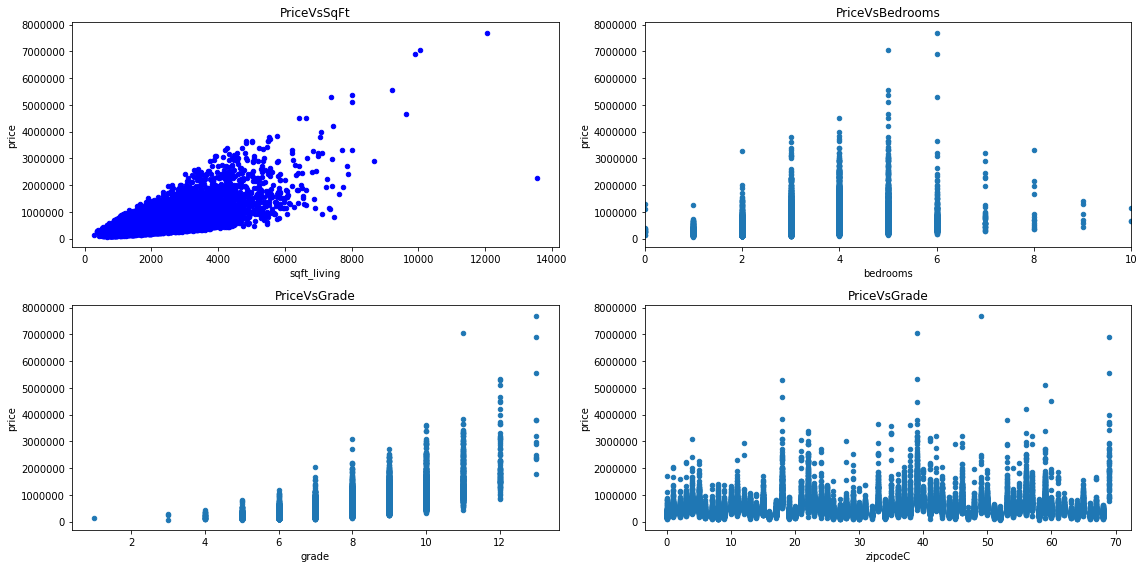

In [4]:
fig = plt.figure(figsize=(16,8))
data_lr.plot(kind='scatter',x='sqft_living',y='price',c='b',title='PriceVsSqFt',ax=plt.subplot(2,2,1))
data_lr.plot(kind='scatter',x='bedrooms',y='price',ax=plt.subplot(2,2,2),xlim=[0,10],title='PriceVsBedrooms')
data_lr.plot(kind='scatter',x='grade',y='price',ax=plt.subplot(2,2,3),title='PriceVsGrade')
data_lr.plot(kind='scatter',x='zipcodeC',y='price',ax=plt.subplot(2,2,4),title='PriceVsGrade')
fig.tight_layout()

### Non Linear Logistic Regression

In [5]:
raw_data = pd.read_csv('weatherAUS.csv',delimiter=',')

data = raw_data[['MinTemp','MaxTemp','Humidity9am','Humidity3pm','Rainfall','RainToday']]

data.isnull().sum()

data = data[pd.notnull(data['RainToday'])]

mean = data[['MinTemp','MaxTemp','Humidity9am','Humidity3pm']].mean(axis=0)

data.fillna(mean,inplace=True);

data.isnull().sum()

data.loc[:,'RainTodayC'] = data['RainToday'].replace({'No': 0, 'Yes': 1})

#data sampled
data_sampled = pd.concat([data[data['RainTodayC']==1].head(40000),data[data['RainTodayC']==0].head(40000)])

Xraw = data_sampled[['Humidity3pm','Rainfall']] #this will be the input samples 
Yraw = data_sampled[['RainTodayC']] # this is the target label in this prices of the house.

print('The total number of features for the regression model are {}'.format(Xraw.shape[1]))
print('The total number of samples in this dataset are {}'.format(Xraw.shape[0]))

The total number of features for the regression model are 2
The total number of samples in this dataset are 71455


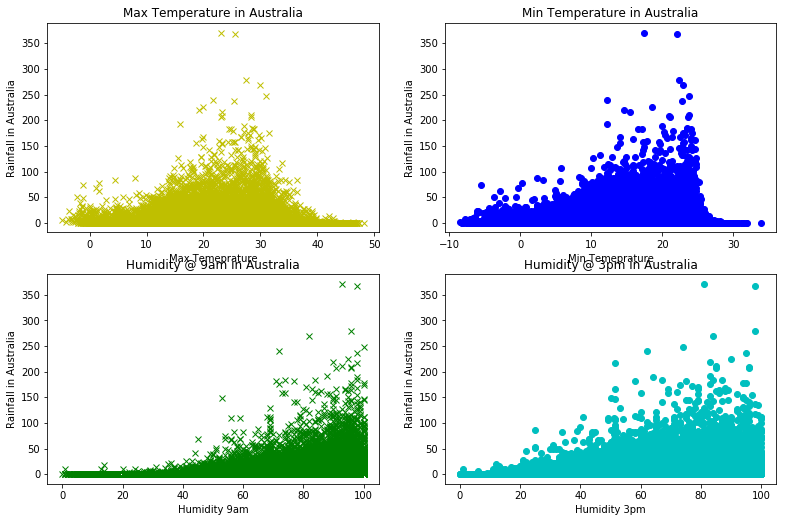

In [6]:
fig = plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(data['MaxTemp'],data['Rainfall'],'xy')
plt.title("Max Temperature in Australia")
plt.xlabel('Max Temeprature')
plt.ylabel('Rainfall in Australia')

plt.subplot(2,2,2)
plt.plot(data['MinTemp'],data['Rainfall'],'ob')
plt.title("Min Temperature in Australia")
plt.xlabel('Min Temeprature')
plt.ylabel('Rainfall in Australia')

plt.subplot(2,2,3)
plt.plot(data['Humidity9am'],data['Rainfall'],'xg')
plt.title("Humidity @ 9am in Australia")
plt.xlabel('Humidity 9am')
plt.ylabel('Rainfall in Australia')


plt.subplot(2,2,4)
plt.plot(data['Humidity3pm'],data['Rainfall'],'oc')
plt.title("Humidity @ 3pm in Australia")
plt.xlabel('Humidity 3pm')
plt.ylabel('Rainfall in Australia')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

## II c) Reading and analyzing the plots

### Regression Data Observation

From the above visualizations we can clearly see that

1. **SqFt** of the apartment seems to be propotional to the cost of the Bedrooms as more bedrooms are offered the price point keeps changing. Thus making it the most important feature as it has more corelation wrt price.

2. **Grade** of the houses looks to be a very good measure to predict if the apartment is going to be priced high or low. There is a direct relation to grade and the pricing of the apartments where higher the grader better or higher are the chances for a better selling price for the houses.

3. **Bedroom** The total number of bedrooms also seems to be a good fit as a predictor as these are proportional to sqFt.

4. The **location** of the houses also have a very significant impact on the cost of houses. Thus this can help us deduce prices to a certain extent when these features are enumerated for us.

### Logistic Regression Data Observation

1. The **Rainfall** predictor is very important since that has a direct relation to the prediction of the label.
2. The **Max and Min temperature** also looks to be important but Min temperature seems to be of more relavant as it has a good estimator of rain
3. **Humidity at 9am and 3pm** also seem to be an important parameter and Humidity at 3pm seems to be and very important feature as there is a clear relation to that of the label

We can also see that there is skew in the number of positive and negative labels . This is not necessarily good as this may effect the prediction and training.
Also the data set does not have any ordinal data that could help us improve our prediction.
We will be using on 2 features for the current classification.

# III Methods

## III A        K Cross Validation ( K =5)

### III A 1. Summary of CV & correctness of implementation

#### K Cross Validation

```
k_cross_validation(X,T,k,hyperparameter,model) {
	
	1. Split the data into K folds.
		i. shuffle the data and labels
		ii. once shuffling of indexes is done split them into k folds

	2. Cross Validation

	loop range(k) {
		Assign one partition as Test for data and labels
		loop range(k) {
			Assign one partition of the remaining partition as Validation for data and labels
			Join all the other remaining partitions as Train for data and labels.
            get_train_data_and_label is the method used for this.

			loop in hyper-parameters {

				Run the training model on the Train data. train_neural_network is the method used for this.
				Get the accuracy for the model.
				Store accuracy : hyper-parameter for combination of validation and hyper-parameter in results.
			}
		}
		Get the best accuracy result and chose it's hyper-paramater.
		Use this to train the model. train_neural_network is the method used for this.
        Note : The train data will be everything other than Test data.
		Get the error.
		Store error with hyper-paramater for the kth Test fold data as error_trace
	}
	return error_trace
}
```

Example :

One complete iteration for one fold where we have 2 sets of hyper-parameter.
```
Test 1, Validation 2, Train (3,4,5), Set 1 HP
Test 1, Validation 2, Train (3,4,5), Set 2 HP

Test 1, Validation 3, Train (2,4,5), Set 1 HP
Test 1, Validation 3, Train (2,4,5), Set 2 HP

Test 1, Validation 4, Train (2,3,5), Set 1 HP
Test 1, Validation 4, Train (2,3,5), Set 2 HP

Test 1, Validation 5, Train (2,3,4), Set 1 HP
Test 1, Validation 5, Train (2,3,4), Set 2 HP
```


In [7]:
import warnings 
warnings.filterwarnings('ignore')

def k_cross_validation(X,T,**kwargs):
    
    ''' k_cross_validation
        parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    **kwargs Different kwargs to the method
        k                 The total number of fold's needed. default = 5
        model             Current Neural Network Model that will be used (regression / logistic regression)
        hyperparameters   List of dictionary consisting the hyperparameter values default.
    '''
    
    k = kwargs.get('k')
    model = kwargs.get('model')
    hyperparameters = kwargs.get('hyperparameters')
    
    data = pd.concat([X,T], axis=1) 
    data = data.sample(frac=1).reset_index(drop=True)
    # Getting back the shuffled X and T.
    T = data.iloc[:,-1].to_frame()
    X = data.iloc[:,0:-1]
    
    print('Splitting the data into {} folds'.format(k))
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    #get the ratio
    ratio = 1 / k;
    N = X.shape[0]
    rows = round(N * ratio)

    Xs = {}
    Ts = {}
    sample_set = []
    i=0;
    for j in range(k):
        if j==(k-1):
            Xs[j] = X.iloc[i:, :]
            Ts[j] = T.iloc[i:, :]
        else:
            Xs[j] = X.iloc[i:i+rows, :]
            Ts[j] = T.iloc[i:i+rows, :]
        i += rows
    
    def get_train_data_and_label(training_set):
        Xtrain = pd.DataFrame()
        Ttrain = pd.DataFrame()
        for m in training_set:
            Xtrain = pd.concat([Xs[m],Xtrain], axis=0)
            Ttrain = pd.concat([Ts[m],Ttrain], axis=0)
        
        return Xtrain.values,Ttrain.values
    
    #{'structure': [2, 3, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 100}
    def train_neural_network(Xtrain,Ytrain,hp, model):
        if model == 'regression':
            clsf = NeuralNet(hp['structure'])
        else:
            clsf = NeuralNetLogReg(hp['structure'])

        clsf.train(Xtrain,
                   Ttrain,
                   optim=hp['optim'],
                   Lambda=hp['Lambda'],
                   niter=hp['niter'],
                   wtracep=True,
                   ftracep=True)
        
        return clsf
        
    error_trace = []
    #At this point we have split the dataset into K folds.
    for i in range(k):
        print('The test set chosen is {}'.format(i))
        Xtest = Xs[i].values
        Ttest = Ts[i].values
        
        results = {}
        for j in range(k):
            if j == i:
                continue
            not_train = [i,j]
            training_set = set(range(k)) - set(not_train)
            print ('The validation set is {}'.format(j))
            print ('The train set is {}'.format(training_set))
            #here i need to get the training set and target set on which i will perform.
            Xtrain, Ttrain = get_train_data_and_label(training_set)
              
            Xval = Xs[j].values
            Tval = Ts[j].values

            for hp in hyperparameters:
                clsf = train_neural_network(Xtrain,Ttrain,hp,model)
                Y, Yprob = clsf.use(Xval,retZ=True)
                if model == 'log-reg':
                    Tval = Tval.flatten()
                accuracy = 100 - np.mean(np.abs(Tval - Y)) * 100
                RMSE=np.sqrt(np.mean((Tval - Y)**2))
                print('RMSE : {}, HyperParameter : {}'.format(RMSE,hp))
                print('Accuracy : {} ,RMSE : {} HyperParameter : {}'.format(accuracy,RMSE,hp))
                results[accuracy] = hp
        
        sorted_result = dict(sorted(results.items(), reverse=True))
        #print('The sorted result is {}'.format(sorted_result))
        index = next(iter(sorted_result))
        print('The best result chosen is {} with accuracy {}'.format(results[index], index))
        training_set = set(range(k)) - set([i])
        print('The training set for test is {}'.format(training_set))
        model_data = []
        Xtrain, Ttrain = get_train_data_and_label(training_set)
       
        model_data.append(Xtrain)
        model_data.append(Ttrain)
        model_data.append(Xtest)
        model_data.append(Ttest)
        
        # Train the network on all the data except the test data with the best parameters.
        clsf = train_neural_network(Xtrain,Ttrain,results[index],model)
        
        Y, Yprob = clsf.use(Xtest,retZ=True)    
        #T = Ttest.values.tolist() Ttest.flatten()
        err = np.sqrt(np.mean((Ttest - Y)**2))
        
        error_trace.append((results[index], err))
        
        #we return the last Xtrain,Ttrain,Xtest,Ttest .
    return error_trace, model_data

### III A 2.      Correctness of CV 

In [8]:
N1 = 500
N2 = 500
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[500:, :] = 1  # labels are zero or one

X = pd.DataFrame(Xtrain)
T = pd.DataFrame(Ttrain)


In [9]:
hyperparameter = [{
	"structure": [2, 4, 2],
	"optim": "scg",
	"Lambda": 0.02,
	"niter": 100
}]

##### Run the Logistic Reression Model before running this

In [12]:
err = k_cross_validation(X,T,k=5,hyperparameters=hyperparameter,model='log-reg')

Splitting the data into 5 folds
The test set chosen is 0
The validation set is 1
The train set is {2, 3, 4}
Inside of SCG
in here
RMSE : 0.18708286933869708, HyperParameter : {'structure': [2, 4, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 100}
Accuracy : 96.5 ,RMSE : 0.18708286933869708 HyperParameter : {'structure': [2, 4, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 100}
The validation set is 2
The train set is {1, 3, 4}
Inside of SCG
in here
RMSE : 0.18708286933869708, HyperParameter : {'structure': [2, 4, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 100}
Accuracy : 96.5 ,RMSE : 0.18708286933869708 HyperParameter : {'structure': [2, 4, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 100}
The validation set is 3
The train set is {1, 2, 4}
Inside of SCG
in here
RMSE : 0.2, HyperParameter : {'structure': [2, 4, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 100}
Accuracy : 96.0 ,RMSE : 0.2 HyperParameter : {'structure': [2, 4, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 100}
The validati

----

## III B Nonlinear Regression

### III B 1. Summary of Nonlinear Regression

#### Non-Linear model for a Neural Networks differs from the linear model in ways where the activation function is a sigmoid function instead of linear threshold unit. 
<u>Why sigmoid and not any other mathematical function?</u>

1. Well, It's not necessary that it has to be sigmoid but generally sigmoid or tanh function is used as it provides stronger gradients for data centered at 0 thus allowing the gradient descent to not keep diverging and changing abruptly.Also we generally use tanh over sigmoid as it scales the gradients better thus helping in convergence especially when the data is centered to zero. We can consider such function to be squishfication function who's purpose is basically try to scale your data-set so that it can fit within [0,1] in case of tanh functions or [-1,1] in the case of sigmoid function.

2. Also, since these functions are itself non-linear any modelling done using these as the activation function will be a non-linear neural network model.

3. The other semantics of the neural network remain the same. Where the network does feed-forward to calculate the weights and backward propogation to update the weights.


<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/nn.png" width=500/>


## Activation function (Feed Forward Propogation)

Now, let $\phi(\xv) = h(\xv)$ where $h$ is the *activation function*.  

$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm \\ 
\\
\Zlm & = \Zm + 1's
\end{align}
$$



## Backpropogation

The backpropagation performs the this weight updates iteratively:  
$$
\begin{align}
\Vm &\leftarrow \Vm + \rho_h \frac{1}{N} \frac{1}{K} \Xlm^\top \Big( (\Tm - \Ym) \Wm^\top \odot (1 - \Zm^2) \Big), \\
\Wm &\leftarrow \Wm + \rho_o \frac{1}{N} \frac{1}{K} \Zlm^\top \Big( \Tm - \Ym \Big)
\end{align}
$$
where $\rho_h$ and $\rho_o$ are the learning rate for hidden and output layer weights. 
Here, $\odot$ denotes the element-wise multiplication.


### III B 2. Explanation of codes 

```
NeuralNet {
	init(nunits) {

		1. We accept the list of input,hidden-units,output and create a basic 
		neural network structure based on the passed nunits.
		2. We create and assign random values to the weights.
	}

	Getters and Setters for hidden layer weights, to pack and unpack weights, to get layers 

	errorf(T,Y) {
		return actual - predicted (T-Y)
	}

	objectf(T,Y,weight_penalty) {
		return MSE for (actual - predicted) with weight_penalty added.
	}

	forward(X) {
		1. We perform operation on equation for Feed propagation.
		2. If the operation of Feed forward propogation is at the last layer we see to it that we don't pass X@W through the activation function.
		return Y,Z (Here Y is the probability and Z is the original X)
	}

	backward(error,Z,T,lambda=0) {
		1. We perform operation based on the backward propogation equation we have above.

	}

	train(X,T) {

		1. set all the parameters passed.
		2. Normalize the input data.
		3. Calculate the gradient based on the optimazation method used. Implementation currently has
			Scaled Conjugate Gradient.
			Steepest Gradient.

		gradientf(w) {
			Perform complete one cycle of Feed forward and back backward propogation
				Y,Z = forward(X)
				error = errorf(T,Y)
				backward(error,Z,T,lambda) (Lambda usually inititalized)
		}

		optimtargetf(w) {
			1. Find the optimization target function by MSE.
				Calcualte wpenalty and use it to find MSE.
		}

		return result obtained from the optimization method used for NN.

	}

	use(X,retZ=false) {
		1. Normalize X 
		2. calculate Feed Forward value for X 
		return the value obtained from 2. (We also have a way to retrieve the values of the weight if we set retZ to true)
	}
}
```

## III .d) Summary of nonlinear logistic regression

#### Non Linear model for logistic regression differs from the Non linear model for linear regression in the ways of it's output for determining the labels of the classes.

1. For Logistic Regression the update function for weights in the last layers would not be the just the summation of $$\Zm@\Wm$$ but that would be passed through a sofftmax function to get back indicator matrix(IM) instead of vector(T).

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

So the update rule for the final layer

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

2. We know that output of the Logistic Regression is calcualted by the Maximum Likelihood for the class and trying to solve for that we get the error function / cost function to be equal to 

$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$


## Feed Forward for Non Linear Logistic Regression
$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm \\
\Gm & = softmax(\Ym)
\end{align}
$$

## Backward Propagation for Non Linear Logistic Regression

$$
\Wm \leftarrow \Wm + \alpha_o \Zlm^\top \Big(  \Tm - g(\Xm)\Big).
$$

$$
\Vm \leftarrow \Vm + \alpha_h \Xlm^\top \Big( (\Tm - g(\Xm)) \Wm^\top \odot (1 - \Zm^2) \Big).
$$

Here, $\odot$ denotes the element-wise multiplication. 



<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/nonlinearlogreg.png" width=600 />

## III .e) Explanation of codes

```
NeuralNetLogReg {

	forward(X){
		softmax(Z) {
			Implement the softmax equation on the input (i.e: Z in this case)
		}
		loop(layers) {
			if last layer 
				apply softmax
			else
				apply activation function (tanh in this case)
		}

	}

	objectf(T,Y,wpenalty) {
		Compute cross entropy using the error function that we have above
		retrun CE + wpenalty
	}

	train(X,T,**params) {
		1. Create a Indicator matrix from the T vector 
		2. Call the NeuralNet.
	}

	use(X) {
		1. Normalize the data-set for test
		2. Apply Feed forward on the data
		3. Find argmax for each of the record.
		return argmax values
	}
}
```

## III .f) Implementation of NonlinearLogReg

In [11]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        self.output_class = nunits[2]  
        NeuralNet.__init__(self, nunits)

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t = X 
        Z = []
        def softmax(z):
            if not isinstance(z, np.ndarray):
                z = np.asarray(z)
            f = np.exp(z) 
            return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
        
        for i in range(self._nLayers):
            Z.append(t)
            
            if i == self._nLayers - 1:
                t = softmax(np.dot(self.add_ones(t), self._W[i]))
                #apply softmax
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        """
        Computes cross entropy/ Error between targets (encoded as one-hot vectors)
        and predictions(Y). 
        Input: predictions (N, k) ndarray
               targets (N, k) ndarray        
        Returns: scalar
        """
        # T and y wala idhar aa saktha hai 1st and 2nd 
        if display == True:
            disp_rmse(self,T,Y)
            disp_actual_predict(self,T,Y)
        epsilon=1e-12
        Y = np.clip(Y, epsilon, 1. - epsilon)
        N = Y.shape[0]
        ce = -np.sum(T*np.log(Y))/N
        return ce + wpenalty

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        # T shouldn't be an vector but a matrix. We can check this here or always pass a target matrix???
        IM = np.zeros((T.shape[0],2))
        for idx,x in enumerate(T):
            if x == 0:
                IM[idx,0]=1
            else:
                IM[idx,1]=1
        NeuralNet.train(self,X,IM,**params)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X, retZ=False):
        # need to use argmax instead of Y
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return np.argmax(Y, 1), Z
        return np.argmax(Y, 1)


## III .g) Examination of correct implementation (NonlinearLogReg) with toy data

Text(0.5, 1.0, 'training data set')

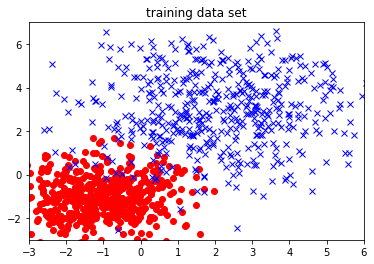

In [13]:
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

In [14]:
#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 200)
Ct2 = np.random.multivariate_normal(mu2, cov2, 200)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((400, 1))
Ttest[200:, :] = 1



Text(0.5, 1.0, 'test data set')

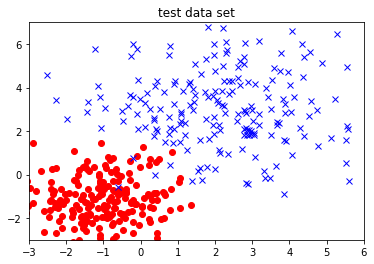

In [15]:
plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [16]:
import warnings 
warnings.filterwarnings('ignore')
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain, optim='steepest',verbose=True,Lambda=0.03,niter=1000,wtracep=True,ftracep=True)

did not converge


In [17]:
Y, Yprob = clsf.use(Xtest,retZ=True)

Accuracy:  97.5 %


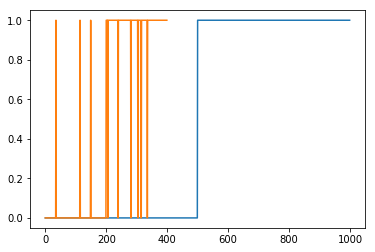

In [18]:
# retrieve labels and plot
plt.plot(T)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs( Ttest.flatten() - Y)) * 100, "%")

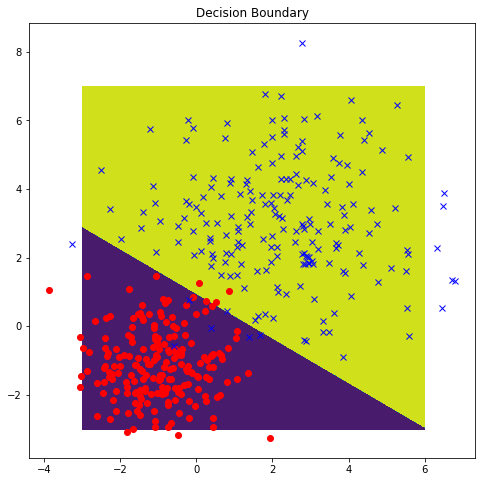

In [19]:

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X,retZ=True)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(8,8))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

# IV - Results


## IV . a) Presentaion of CV results

## Non Linear  Regression Result

In [55]:
hyperparameter = [{
	"structure": [4, 5, 2],
	"optim": "scg",
	"Lambda": 0.2,
	"niter": 1000
},
 {
	"structure": [4, 20, 2],
	"optim": "steepest",
	"Lambda": 0.02,
	"niter": 2500
},
 {
	"structure": [4, 25, 2],
	"optim": "scg",
	"Lambda": 0.02,
	"niter": 1000
},
 {
	"structure": [4, 10, 2],
	"optim": "steepest",
	"Lambda": 0.2,
	"niter": 500
},
 {
	"structure": [4, 15, 2],
	"optim": "steepest",
	"Lambda": 0.4,
	"niter": 500
}
]

In [56]:
errReal_regression,model_data_regression  = k_cross_validation(
    Xraw_lr,Yraw_lr,k=5,hyperparameters=hyperparameter,model='regression')

Splitting the data into 5 folds
The test set chosen is 0
The validation set is 1
The train set is {2, 3, 4}
Inside of SCG
RMSE : 313275.1756546552, HyperParameter : {'structure': [4, 5, 2], 'optim': 'scg', 'Lambda': 0.2, 'niter': 1000}
Accuracy : -20153227.79240742 ,RMSE : 313275.1756546552 HyperParameter : {'structure': [4, 5, 2], 'optim': 'scg', 'Lambda': 0.2, 'niter': 1000}
RMSE : 228417.46393013292, HyperParameter : {'structure': [4, 20, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 2500}
Accuracy : -15282522.896053473 ,RMSE : 228417.46393013292 HyperParameter : {'structure': [4, 20, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 2500}
Inside of SCG
RMSE : 260867.75093612695, HyperParameter : {'structure': [4, 25, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
Accuracy : -17640672.50141451 ,RMSE : 260867.75093612695 HyperParameter : {'structure': [4, 25, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
RMSE : 243325.63714571475, HyperParameter : {'structure': [4, 10, 2

RMSE : 235991.4906320397, HyperParameter : {'structure': [4, 10, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
Accuracy : -15410255.46639158 ,RMSE : 235991.4906320397 HyperParameter : {'structure': [4, 10, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
RMSE : 240055.4083426388, HyperParameter : {'structure': [4, 15, 2], 'optim': 'steepest', 'Lambda': 0.4, 'niter': 500}
Accuracy : -15498480.725601755 ,RMSE : 240055.4083426388 HyperParameter : {'structure': [4, 15, 2], 'optim': 'steepest', 'Lambda': 0.4, 'niter': 500}
The validation set is 3
The train set is {0, 2, 4}
Inside of SCG
RMSE : 372898.4359411412, HyperParameter : {'structure': [4, 5, 2], 'optim': 'scg', 'Lambda': 0.2, 'niter': 1000}
Accuracy : -21574730.926224105 ,RMSE : 372898.4359411412 HyperParameter : {'structure': [4, 5, 2], 'optim': 'scg', 'Lambda': 0.2, 'niter': 1000}
RMSE : 262704.78533828893, HyperParameter : {'structure': [4, 20, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 2500}
Accuracy : -15971

RMSE : 280077.87288158253, HyperParameter : {'structure': [4, 25, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
Accuracy : -16332682.265612219 ,RMSE : 280077.87288158253 HyperParameter : {'structure': [4, 25, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
RMSE : 292737.45421338413, HyperParameter : {'structure': [4, 10, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
Accuracy : -16325338.02774598 ,RMSE : 292737.45421338413 HyperParameter : {'structure': [4, 10, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
RMSE : 297705.98877853964, HyperParameter : {'structure': [4, 15, 2], 'optim': 'steepest', 'Lambda': 0.4, 'niter': 500}
Accuracy : -16443137.766833123 ,RMSE : 297705.98877853964 HyperParameter : {'structure': [4, 15, 2], 'optim': 'steepest', 'Lambda': 0.4, 'niter': 500}
The best result chosen is {'structure': [4, 20, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 2500} with accuracy -15066003.586946797
The training set for test is {0, 1, 3, 4}
The test set c

RMSE : 317786.15088277456, HyperParameter : {'structure': [4, 5, 2], 'optim': 'scg', 'Lambda': 0.2, 'niter': 1000}
Accuracy : -20341494.201625574 ,RMSE : 317786.15088277456 HyperParameter : {'structure': [4, 5, 2], 'optim': 'scg', 'Lambda': 0.2, 'niter': 1000}
RMSE : 230402.95732120486, HyperParameter : {'structure': [4, 20, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 2500}
Accuracy : -15284119.085201653 ,RMSE : 230402.95732120486 HyperParameter : {'structure': [4, 20, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 2500}
Inside of SCG
RMSE : 235782.10265883672, HyperParameter : {'structure': [4, 25, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
Accuracy : -15582221.180838037 ,RMSE : 235782.10265883672 HyperParameter : {'structure': [4, 25, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
RMSE : 244734.449082479, HyperParameter : {'structure': [4, 10, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
Accuracy : -15563507.53428055 ,RMSE : 244734.449082479 HyperParamet

In [58]:
errReal_regression

[({'structure': [4, 20, 2],
   'optim': 'steepest',
   'Lambda': 0.02,
   'niter': 2500},
  217422.29683228332),
 ({'structure': [4, 20, 2],
   'optim': 'steepest',
   'Lambda': 0.02,
   'niter': 2500},
  228969.50026445987),
 ({'structure': [4, 20, 2],
   'optim': 'steepest',
   'Lambda': 0.02,
   'niter': 2500},
  222210.86126193678),
 ({'structure': [4, 20, 2],
   'optim': 'steepest',
   'Lambda': 0.02,
   'niter': 2500},
  262691.16277718847),
 ({'structure': [4, 20, 2],
   'optim': 'steepest',
   'Lambda': 0.02,
   'niter': 2500},
  267090.91850461747)]


## Non Linear Logistic Regression Result

### Executing this will run the CV for and will take ~3 hrs

In [23]:
hyperparameter = [{
	"structure": [2, 5, 2],
	"optim": "scg",
	"Lambda": 0.02,
	"niter": 1000
},
 {
	"structure": [2, 10, 2],
	"optim": "scg",
	"Lambda": 0.2,
	"niter": 500
},
 {
	"structure": [2, 10, 2],
	"optim": "steepest",
	"Lambda": 0.02,
	"niter": 500
},
 {
	"structure": [2, 5, 2],
	"optim": "steepest",
	"Lambda": 0.2,
	"niter": 500
},
 {
	"structure": [2, 15, 2],
	"optim": "steepest",
	"Lambda": 0.4,
	"niter": 500
}
]

#### If needed to vaildate validate using the best parameter we found for structure and lambda

In [165]:
hyperparameter = [{
	"structure": [2, 10, 2],
	"optim": "scg",
	"Lambda": 0.02,
	"niter": 500
}]

In [24]:
errReal,model_data  = k_cross_validation(Xraw,Yraw,k=5,hyperparameters=hyperparameter,model='log-reg')

Splitting the data into 5 folds
The test set chosen is 0
The validation set is 1
The train set is {2, 3, 4}
Inside of SCG
in here
RMSE : 0.436748695148132, HyperParameter : {'structure': [2, 5, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
Accuracy : 80.92505772864041 ,RMSE : 0.436748695148132 HyperParameter : {'structure': [2, 5, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
Inside of SCG
in here
RMSE : 0.6663750440939585, HyperParameter : {'structure': [2, 10, 2], 'optim': 'scg', 'Lambda': 0.2, 'niter': 500}
Accuracy : 55.59443006087748 ,RMSE : 0.6663750440939585 HyperParameter : {'structure': [2, 10, 2], 'optim': 'scg', 'Lambda': 0.2, 'niter': 500}
in here
RMSE : 0.4009993813132247, HyperParameter : {'structure': [2, 10, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 500}
Accuracy : 83.9199496186411 ,RMSE : 0.4009993813132247 HyperParameter : {'structure': [2, 10, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 500}
in here
RMSE : 0.39280136407947924, HyperParameter :

in here
RMSE : 0.4159038336928553, HyperParameter : {'structure': [2, 5, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
Accuracy : 82.70240011195858 ,RMSE : 0.4159038336928553 HyperParameter : {'structure': [2, 5, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
in here
RMSE : 0.441608246523933, HyperParameter : {'structure': [2, 15, 2], 'optim': 'steepest', 'Lambda': 0.4, 'niter': 500}
Accuracy : 80.49821566020572 ,RMSE : 0.441608246523933 HyperParameter : {'structure': [2, 15, 2], 'optim': 'steepest', 'Lambda': 0.4, 'niter': 500}
The validation set is 3
The train set is {0, 2, 4}
Inside of SCG
in here
RMSE : 0.39297946491115604, HyperParameter : {'structure': [2, 5, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
Accuracy : 84.55671401581415 ,RMSE : 0.39297946491115604 HyperParameter : {'structure': [2, 5, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
Inside of SCG
in here
RMSE : 0.6588773602355317, HyperParameter : {'structure': [2, 10, 2], 'optim': 'scg', 'Lambd

in here
RMSE : 0.5100624857960208, HyperParameter : {'structure': [2, 10, 2], 'optim': 'scg', 'Lambda': 0.2, 'niter': 500}
Accuracy : 73.98362605835841 ,RMSE : 0.5100624857960208 HyperParameter : {'structure': [2, 10, 2], 'optim': 'scg', 'Lambda': 0.2, 'niter': 500}
in here
RMSE : 0.4814812821250027, HyperParameter : {'structure': [2, 10, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 500}
Accuracy : 76.81757749632635 ,RMSE : 0.4814812821250027 HyperParameter : {'structure': [2, 10, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 500}
in here
RMSE : 0.44492331474118085, HyperParameter : {'structure': [2, 5, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
Accuracy : 80.20432439997201 ,RMSE : 0.44492331474118085 HyperParameter : {'structure': [2, 5, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
in here
RMSE : 0.49903692848654246, HyperParameter : {'structure': [2, 15, 2], 'optim': 'steepest', 'Lambda': 0.4, 'niter': 500}
Accuracy : 75.09621440067176 ,RMSE : 0.499036928

in here
RMSE : 0.39942580016964196, HyperParameter : {'structure': [2, 5, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
Accuracy : 84.04590301588412 ,RMSE : 0.39942580016964196 HyperParameter : {'structure': [2, 5, 2], 'optim': 'steepest', 'Lambda': 0.2, 'niter': 500}
in here
RMSE : 0.44089463186993744, HyperParameter : {'structure': [2, 15, 2], 'optim': 'steepest', 'Lambda': 0.4, 'niter': 500}
Accuracy : 80.56119235882723 ,RMSE : 0.44089463186993744 HyperParameter : {'structure': [2, 15, 2], 'optim': 'steepest', 'Lambda': 0.4, 'niter': 500}
The validation set is 1
The train set is {0, 2, 3}
Inside of SCG
in here
RMSE : 0.3269869101927601, HyperParameter : {'structure': [2, 5, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
Accuracy : 89.30795605625919 ,RMSE : 0.3269869101927601 HyperParameter : {'structure': [2, 5, 2], 'optim': 'scg', 'Lambda': 0.02, 'niter': 1000}
Inside of SCG
in here
RMSE : 0.5243360339874431, HyperParameter : {'structure': [2, 10, 2], 'optim': 'scg', 'L

In [57]:
errReal

[({'structure': [2, 10, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 500},
  0.6938895985900674),
 ({'structure': [2, 10, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 500},
  0.6944335658494345),
 ({'structure': [2, 10, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 500},
  0.6738551912172788),
 ({'structure': [2, 10, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 500},
  0.6847892098805068),
 ({'structure': [2, 10, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 500},
  0.6919575213805643)]

In [ ]:
Xtrain = model_data[0]
Ttrain = model_data[1]
Xtest = model_data[2]
Ttest = model_data[3]


## IV 4 .b) Discussions about parameter/network structure choice

### Non Linear Regression CV results for each fold
Note : There might be small changes in RMSE values each time we run it as we shuffle the data in random fashion.

| Fold Number | Structure | Optimization | Lambda | Iteration | RMSE
| --- | --- | --- | --- | --- |--- |
| 1 | Input=4,Hidden-unit=20,Output=2 | steepest | 0.02 | 2500 | 237781.96044113097
| 2 | Input=4,Hidden-unit=20,Output=2 | steepest | 0.02 | 2500 | 240289.20723946625
| 3 | Input=4,Hidden-unit=20,Output=2 | steepest | 0.02 | 2500 | 249783.04921379086
| 4 | Input=4,Hidden-unit=20,Output=2 | steepest | 0.02 | 2500 | 242767.95467890607
| 5 | Input=4,Hidden-unit=20,Output=2 | steepest | 0.02 | 2500 | 251664.54859628074

### Non Linear Regression Logistic Regression CV results for each fold
Note : There might be small changes in RMSE values each time we run it as we shuffle the data in random fashion.

| Fold Number | Structure | Optimization | Lambda | Iteration | RMSE
| --- | --- | --- | --- | --- |--- |
| 1 | Input=2,Hidden-unit=10,Output=2 | steepest | 0.02 | 500 | 0.6938895985900674
| 2 | Input=2,Hidden-unit=10,Output=2 | steepest | 0.02 | 500 | 0.6944335658494345
| 3 | Input=2,Hidden-unit=10,Output=2 | steepest | 0.02 | 500 | 0.6738551912172788
| 4 | Input=2,Hidden-unit=10,Output=2 | steepest | 0.02 | 500 | 0.6847892098805068
| 5 | Input=2,Hidden-unit=10,Output=2 | steepest | 0.02 | 500 | 0.6919575213805643

#### Network Choice

1. I tried to use as many different combinations i could for both the model in hand

2. I individually tried most of the hyperparameter before making the set.

3. We run each model a total of 105 times :) (per iteration we have 5 HP on each validation fold viz. 4 excluding test fold and then we run on the test fold using the best) = `20 * 5 + 5`



**Non Linear Regression**

Structure choice was `[4, 20, 2]` as this was the best structure for the dataset.

**Non Linear Logistic Regression**

Structure choice was `[2, 10, 2]` as this was the best structure for the dataset.

## IV 4 .c) Discussion about the prediction results


### Using the best parameter for training for Non Linear Regression
```({'structure': [4, 20, 2],
   'optim': 'steepest',
   'Lambda': 0.02,
   'niter': 2500},
  217422.29683228332)```

### Using the best parameter for training for Non Linear Logsitic Regression

```{'structure': [2, 10, 2], 'optim': 'steepest', 'Lambda': 0.02, 'niter': 500},
  0.6620029065616936)```


### Non Linear Regression Results

In [59]:
Xtrain_r = model_data_regression[0]
Ttrain_r = model_data_regression[1]
Xtest_r = model_data_regression[2]
Ttest_r = model_data_regression[3]

In [62]:
nn = NeuralNet([4,20,2])
nn.train(Xtrain_r, Ttrain_r, optim='steepest',verbose=True,Lambda=0.02,niter=2500,wtracep=True,ftracep=True)
Y_r,Z_r = nn.use(Xtest_r, retZ=True)

did not converge


In [65]:
print("MSE :", np.sqrt(np.mean((Ttest_r - Y_r)**2)))


MSE : 267231.1741534236


## The values of predicted and Actual are really very very close

In [64]:
for i in range(Xtest_r.shape[0]): 
    print("House with {} sq.ft for {} bedroom with grade {} with pincode {} predicted ${} and expected ${}"
          .format(Xtest_r[i][0],Xtest_r[i][1],Xtest_r[i][2],Xtest_r[i][3],np.mean(Y_r[i]),Ttest_r[i]))

House with 1800 sq.ft for 3 bedroom with grade 7 with pincode 6 predicted $423677.8427968387 and expected $[258500.]
House with 2920 sq.ft for 4 bedroom with grade 9 with pincode 22 predicted $773206.7574634883 and expected $[1738000.]
House with 1610 sq.ft for 4 bedroom with grade 6 with pincode 27 predicted $305065.5874617057 and expected $[235000.]
House with 2360 sq.ft for 4 bedroom with grade 8 with pincode 26 predicted $558138.3427332547 and expected $[392000.]
House with 2230 sq.ft for 4 bedroom with grade 7 with pincode 36 predicted $449386.72608743253 and expected $[448000.]
House with 2330 sq.ft for 3 bedroom with grade 8 with pincode 4 predicted $574887.0072317456 and expected $[588500.]
House with 1550 sq.ft for 3 bedroom with grade 7 with pincode 64 predicted $380270.17565821094 and expected $[369000.]
House with 2150 sq.ft for 3 bedroom with grade 8 with pincode 42 predicted $547135.2456538462 and expected $[580000.]
House with 3400 sq.ft for 5 bedroom with grade 8 with p

House with 1210 sq.ft for 4 bedroom with grade 7 with pincode 11 predicted $324413.521777204 and expected $[485000.]
House with 2430 sq.ft for 4 bedroom with grade 8 with pincode 9 predicted $567627.8281841037 and expected $[449500.]
House with 2600 sq.ft for 4 bedroom with grade 9 with pincode 28 predicted $714650.5146004723 and expected $[600000.]
House with 1690 sq.ft for 4 bedroom with grade 7 with pincode 59 predicted $376125.66959857993 and expected $[548000.]
House with 2570 sq.ft for 6 bedroom with grade 7 with pincode 11 predicted $470418.77310761437 and expected $[705000.]
House with 3280 sq.ft for 4 bedroom with grade 11 with pincode 4 predicted $1166726.682234075 and expected $[810000.]
House with 1700 sq.ft for 3 bedroom with grade 7 with pincode 58 predicted $399906.29947144975 and expected $[245000.]
House with 1160 sq.ft for 2 bedroom with grade 7 with pincode 11 predicted $372714.1150796101 and expected $[468000.]
House with 1410 sq.ft for 3 bedroom with grade 7 with p

House with 810 sq.ft for 1 bedroom with grade 7 with pincode 59 predicted $349496.1818336851 and expected $[285000.]
House with 1340 sq.ft for 3 bedroom with grade 6 with pincode 38 predicted $296309.52498546726 and expected $[335000.]
House with 1570 sq.ft for 3 bedroom with grade 7 with pincode 48 predicted $384211.30720169825 and expected $[458000.]
House with 1050 sq.ft for 2 bedroom with grade 7 with pincode 9 predicted $360278.05499958934 and expected $[163500.]
House with 1540 sq.ft for 3 bedroom with grade 8 with pincode 15 predicted $459842.69552900293 and expected $[543000.]
House with 2220 sq.ft for 4 bedroom with grade 8 with pincode 55 predicted $539543.4822611648 and expected $[580000.]
House with 1880 sq.ft for 5 bedroom with grade 7 with pincode 10 predicted $388255.1274822445 and expected $[585000.]
House with 1010 sq.ft for 3 bedroom with grade 6 with pincode 58 predicted $257799.4451863587 and expected $[180000.]
House with 1660 sq.ft for 3 bedroom with grade 7 with 

House with 2190 sq.ft for 4 bedroom with grade 8 with pincode 62 predicted $536132.5921718492 and expected $[540000.]
House with 1030 sq.ft for 2 bedroom with grade 7 with pincode 45 predicted $346785.9279704248 and expected $[305000.]
House with 420 sq.ft for 1 bedroom with grade 4 with pincode 3 predicted $182536.91205323974 and expected $[229050.]
House with 1030 sq.ft for 3 bedroom with grade 7 with pincode 28 predicted $322135.47650497174 and expected $[275000.]
House with 1660 sq.ft for 4 bedroom with grade 7 with pincode 38 predicted $373377.22779883957 and expected $[290000.]
House with 2040 sq.ft for 3 bedroom with grade 8 with pincode 9 predicted $531828.1553377444 and expected $[346950.]
House with 2440 sq.ft for 4 bedroom with grade 8 with pincode 13 predicted $569565.3485952753 and expected $[525000.]
House with 1740 sq.ft for 2 bedroom with grade 7 with pincode 11 predicted $445073.56162656867 and expected $[452000.]
House with 3470 sq.ft for 4 bedroom with grade 8 with p

House with 890 sq.ft for 2 bedroom with grade 7 with pincode 1 predicted $344746.7643477646 and expected $[285000.]
House with 3370 sq.ft for 5 bedroom with grade 7 with pincode 57 predicted $611014.0130660617 and expected $[762000.]
House with 2440 sq.ft for 3 bedroom with grade 8 with pincode 33 predicted $592488.5685364257 and expected $[1285000.]
House with 1700 sq.ft for 3 bedroom with grade 8 with pincode 11 predicted $482829.83543334657 and expected $[559000.]
House with 1330 sq.ft for 2 bedroom with grade 6 with pincode 67 predicted $318810.16710601747 and expected $[455000.]
House with 1760 sq.ft for 3 bedroom with grade 7 with pincode 20 predicted $414537.8516755486 and expected $[290000.]
House with 4360 sq.ft for 4 bedroom with grade 10 with pincode 35 predicted $1295104.9944885885 and expected $[2300000.]
House with 1680 sq.ft for 4 bedroom with grade 7 with pincode 11 predicted $381138.1677888673 and expected $[588000.]
House with 2100 sq.ft for 4 bedroom with grade 7 wit

House with 2110 sq.ft for 3 bedroom with grade 7 with pincode 0 predicted $465834.24147217383 and expected $[288250.]
House with 1920 sq.ft for 3 bedroom with grade 8 with pincode 30 predicted $512566.9315949919 and expected $[329000.]
House with 1680 sq.ft for 3 bedroom with grade 7 with pincode 45 predicted $398806.42908700276 and expected $[450000.]
House with 2080 sq.ft for 3 bedroom with grade 8 with pincode 15 predicted $537302.3884122486 and expected $[715000.]
House with 2370 sq.ft for 3 bedroom with grade 7 with pincode 39 predicted $493695.7518254351 and expected $[943500.]
House with 990 sq.ft for 2 bedroom with grade 6 with pincode 31 predicted $288351.0434523787 and expected $[329000.]
House with 1860 sq.ft for 3 bedroom with grade 7 with pincode 34 predicted $424410.5721105848 and expected $[291000.]
House with 1170 sq.ft for 3 bedroom with grade 5 with pincode 48 predicted $225313.59287508376 and expected $[315000.]
House with 2740 sq.ft for 4 bedroom with grade 8 with p

House with 1970 sq.ft for 3 bedroom with grade 8 with pincode 9 predicted $521642.2512379087 and expected $[429800.]
House with 1920 sq.ft for 3 bedroom with grade 8 with pincode 2 predicted $515174.8790780376 and expected $[432000.]
House with 2140 sq.ft for 4 bedroom with grade 7 with pincode 11 predicted $440770.31464565673 and expected $[615750.]
House with 3305 sq.ft for 4 bedroom with grade 7 with pincode 17 predicted $609883.5479945082 and expected $[492000.]
House with 830 sq.ft for 3 bedroom with grade 7 with pincode 47 predicted $295447.79116021644 and expected $[135000.]
House with 1530 sq.ft for 4 bedroom with grade 6 with pincode 16 predicted $299402.780411884 and expected $[220000.]
House with 1680 sq.ft for 3 bedroom with grade 7 with pincode 6 predicted $408335.8618884185 and expected $[250000.]
House with 3270 sq.ft for 4 bedroom with grade 9 with pincode 23 predicted $844708.0945284049 and expected $[1033890.]
House with 2140 sq.ft for 5 bedroom with grade 8 with pinc

House with 2720 sq.ft for 4 bedroom with grade 9 with pincode 17 predicted $731546.1555360754 and expected $[560000.]
House with 1310 sq.ft for 3 bedroom with grade 7 with pincode 35 predicted $353992.0851723111 and expected $[553000.]
House with 2140 sq.ft for 3 bedroom with grade 8 with pincode 6 predicted $546676.0125367478 and expected $[270000.]
House with 1890 sq.ft for 3 bedroom with grade 7 with pincode 1 predicted $436781.68355836155 and expected $[435000.]
House with 2700 sq.ft for 4 bedroom with grade 8 with pincode 34 predicted $615270.2147197586 and expected $[569950.]
House with 1200 sq.ft for 2 bedroom with grade 6 with pincode 60 predicted $305057.4558751985 and expected $[290000.]
House with 2250 sq.ft for 4 bedroom with grade 8 with pincode 18 predicted $540285.7841407319 and expected $[1060000.]
House with 2090 sq.ft for 4 bedroom with grade 7 with pincode 0 predicted $436493.4601187743 and expected $[210000.]
House with 3490 sq.ft for 4 bedroom with grade 8 with pin

### Non Linear Logistic Regression Results

In [30]:
import warnings 
warnings.filterwarnings('ignore')
clsf = NeuralNetLogReg([2, 10, 2])
clsf.train(Xtrain, Ttrain, optim='steepest',verbose=True,Lambda=0.02,niter=500,wtracep=True,ftracep=True)


did not converge


In [33]:
Y, Yprob = clsf.use(Xtest,retZ=True)

In [34]:
Ttest = Ttest.flatten()

In [35]:
print("Accuracy: ", 100 - np.mean(np.abs( Ttest - Y)) * 100, "%")

Accuracy:  97.75 %


In [36]:
print("MSE :", np.sqrt(np.mean((Ttest - Y)**2)))

MSE : 0.15


### what nonlinear regression model learned ?

1. The Non Linear Regression model try to learn the weights to predict value associated to the Target.
2. Instead of using a linear (perceptron) model the model tried to fit a non linear dataset.
3. The activation function associated to each of the models actually helps squishfy the data in such a way that values that are close to the center takes precendence and as these are the data that actually matter since they are the ones who are closer to the boundary and predicting them is the true test of a model.
4. We only used tanh as the activation function but sigmoid could also be used.
5. Backward propogation helps us in reducing the RMSE of the eventual output as we tend to push the values of the weights to the first layer's weight for it to update. 
6. In this way we perform `(Feed Forward --> min(RMSE) ---> update weights of layers (backward propogation))`
7. We repeat step 6. till we are convinced that the RMSE won't drop any further.
8. Also there are optimazation functions that we used to calculate the gradients.


## IV .d) Plot for results

### Plots for Non Linear Regression Model

#### Helper bestfit function

In [37]:

from numpy.polynomial.polynomial import polyfit

def bestfit(X,Y):
    x = np.ravel(X[:,0])
    y = np.ravel(np.transpose(Y))
    b,m = polyfit(x,y,1)
    return x,y,b,m

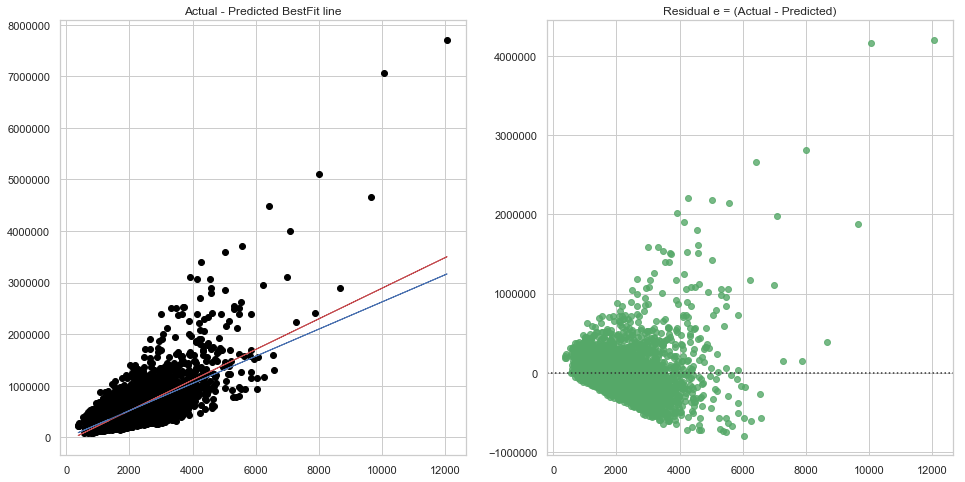

In [63]:
import seaborn as sns

fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Actual - Predicted BestFit line')
plt.plot(Xtest_r[:,0],Ttest_r,'o',color='black')

##ACTUAL
[x,y,b,m] = bestfit(Xtest_r,Ttest_r)
plt.plot(x, b + m * x, '-',lw=1,color='r')

##PREDICTED
[xp,yp,bp,mp] = bestfit(Xtest_r,np.mean(Y_r, axis=1))
plt.plot(xp, bp + mp * xp, '-',lw=1,color='b')

sns.set(style="whitegrid")
plt.subplot(1,2,2)
plt.title('Residual e = (Actual - Predicted)')
residual=(Ttest_r - np.mean(Y_r))
sns.residplot(np.array(Xtest_r[:,0]), np.array(residual), color="g")

---

### Plots for Non Linear Logistic Regression model

Text(0.5, 1.0, 'Actual and Predicted Output')

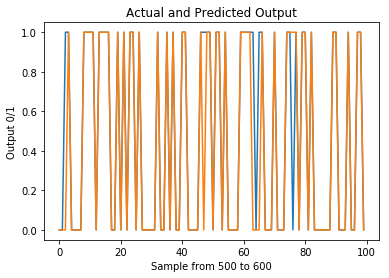

In [26]:
# retrieve labels and plot
plt.plot(Ttest[500:600])
plt.plot(Y[500:600])
plt.xlabel('Sample from 500 to 600')
plt.ylabel('Output 0/1')
plt.title('Actual and Predicted Output')

In [64]:
X_c0, T_c0 = Xtest[np.where(Ttest == 0)[0],:], Xtest[np.where(Ttest == 0)]
X_c1, T_c1 = Xtest[np.where(Ttest == 1)[0],:], Xtest[np.where(Ttest == 1)]

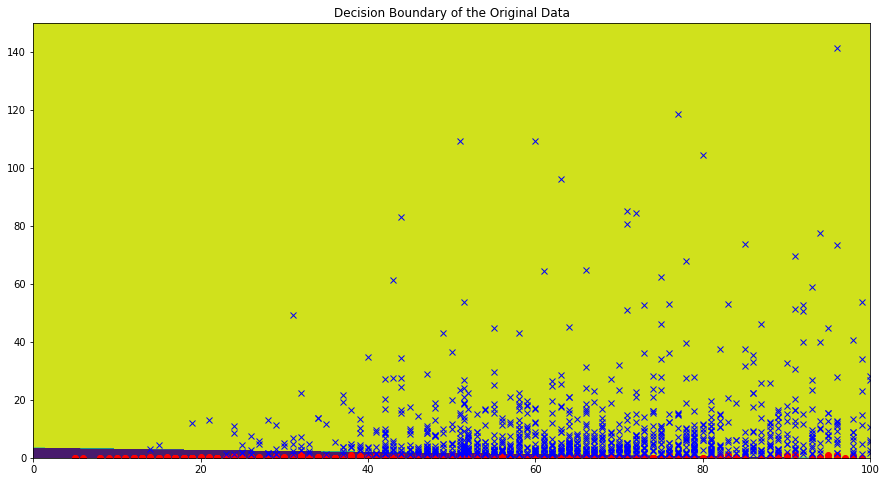

In [92]:
X_c0 = Xtest[np.where(Ttest == 0)[0],:]
X_c1 = Xtest[np.where(Ttest == 1)[0],:]

x = np.linspace(0, 100, 1000)
y = np.linspace(0, 150, 1000)

xs, ys = np.meshgrid(x,y)

Xval = np.vstack((xs.flat, ys.flat)).T

Yval, Yprob = clsf.use(Xval)

zs = Yval.reshape(xs.shape)

fig = plt.figure(figsize=(15,8))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary of the Original Data")
plt.plot(X_c0[:1000, 0], X_c0[:1000, 1], 'or')
plt.plot(X_c1[:1000, 0], X_c1[:1000, 1], 'xb')

# Conclusions

1. I initially found it difficult to understand how to implement the k cross validation as this required me to use the train, validation and test data and also had to try out all combinations of all the folds in every iteration.

2. I also faced some issues trying to understand backward propogation proof in closed form and had to spend considerable amount of time implementing it.


**Request** 
I actually was fascinated by the graphs we had for training and testing that we had in our class notes but then I realised we had model the data in such a fashion to get those graphs to look pretty. I know sklearn has a lot of tools to do this but I would really want to try all those graphs on some test data. If professor can provide us a cheat sheet of all the visualization on real dataset esp ( How to check for convergence while training viz) it would be great as I really want to plot them too for my future work / papers.
Thanks


# Reference 
[1]. [Neural Network Notes by Prof](https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural%20Networks.ipynb)

[2]. [Non Linear Logistic Regression Notes by Prof](https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.ipynb)